# Лабораторная работа 7

FOREL

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

def po(x, y):
    return np.linalg.norm(np.array(x) - np.array(y))


def forel(points, r=10):
    clusters = []
    while points:
        с = random.choice(points)
        cluster = [с]
        points.remove(с)
        while True:
            closest = [p for p in points if po(p, с) <= r]
            if not closest:
                break
            new_с = tuple(map(lambda x: sum(x) / len(x), zip(*closest)))
            if new_с == с:
                break
            с = new_с
            cluster.extend(closest)
            for n in closest:
                points.remove(n)
        clusters.append(cluster)
    return clusters

4


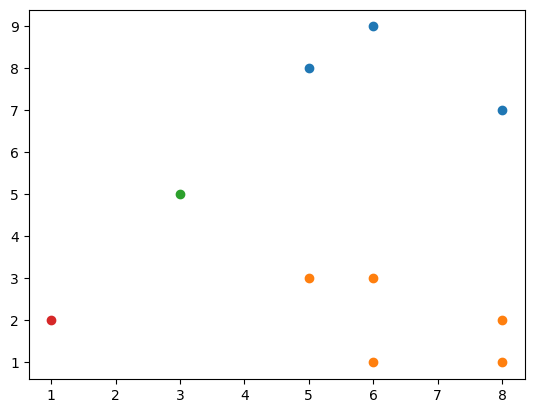

In [15]:
points = [[6,9],[6,1],[1,2],[8,7],[3,5],[6,3],[5,3],[5,8],[8,2],[8,1]]
result = forel(points, r=3.5)
print(len(result))

for cluster in result:
    arr = np.array(cluster)
    plt.scatter(arr[:, 0], arr[:, 1])

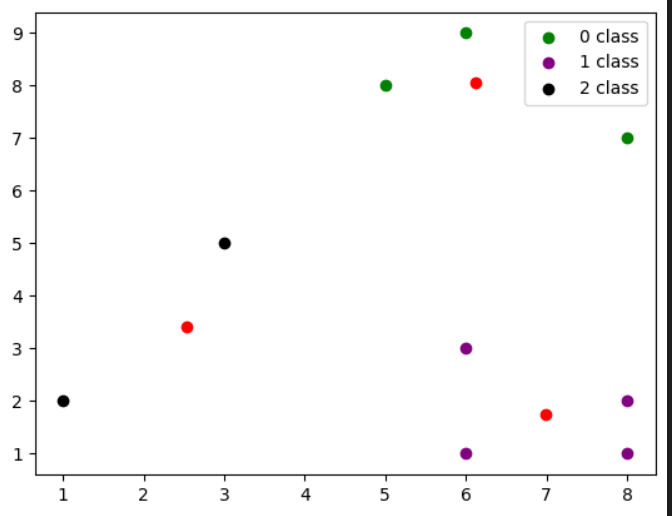

In [30]:
t = [0,3,1,0,0] # 0 
o = [4,0,1,1,1] # 1
c = [2,24,9,1,1] # 2
p = [1,0,4,1,0] # 3
ob = [3,0,4,0,0] # 4
points = [t,o,c,p,ob]
result = forel(points, r=3.5)
for cluster in result:
    print(cluster)


[[3, 0, 4, 0, 0], [4, 0, 1, 1, 1], [1, 0, 4, 1, 0]]
[[2, 24, 9, 1, 1]]
[[0, 3, 1, 0, 0]]


7


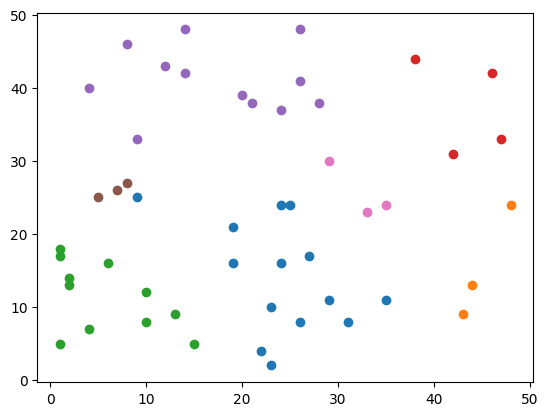

In [46]:
np.random.seed(1)
points = [[np.random.randint(1, 50), np.random.randint(1, 50)] for _ in range(50)]
result = forel(points, r=12)
print(len(result))

for cluster in result:
    arr = np.array(cluster)
    plt.scatter(arr[:, 0], arr[:, 1])

Поиск регионов

In [35]:
import cv2
from PIL import Image

In [55]:
def region_shearching(image, t=20):
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap='gray')
    h, w = img.shape[:2]
    region = np.zeros((h, w), np.uint8)
    queue = [(0, 0)]
    while len(queue) > 0:
        x, y = queue[0]
        region[x, y] = img[x, y]
        queue.pop(0)
        for i in range(-1, 2):
            for j in range(-1, 2):
                if i == 0 and j == 0:
                    continue
                if x + i < 0 or y + j < 0 or x + i >= h or y + j >= w:
                    continue
                if abs(int(img[x + i, y + j]) - int(img[x, y])) < t and region[x + i, y + j] == 0:
                    queue.append((x + i, y + j))
                    region[x + i, y + j] = img[ x + i, y + j]
    return region


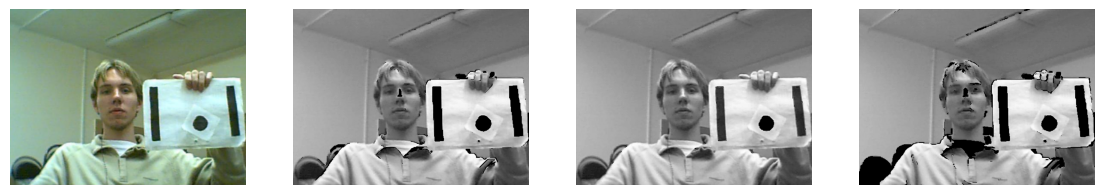

In [47]:
image = "test8.PNG"
fig = plt.figure(figsize=(14, 14))
fig.add_subplot(1, 4, 1)
plt.axis('off')
img = np.array(Image.open(image))
plt.imshow(img)
fig.add_subplot(1, 4, 2)
plt.axis('off')
reg = region_shearching(image, t=10)
plt.imshow(reg, cmap="gray")
fig.add_subplot(1, 4, 3)
plt.axis('off')
reg = region_shearching(image, t=20)
plt.imshow(reg, cmap="gray")
fig.add_subplot(1, 4, 4)
plt.axis('off')
reg = region_shearching(image, t=7)
plt.imshow(reg, cmap="gray")

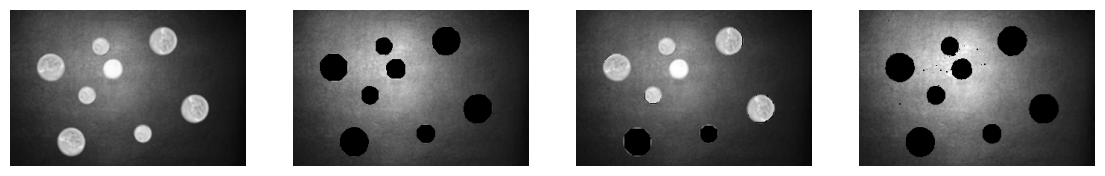

In [49]:
image = "test9.PNG"
fig = plt.figure(figsize=(14, 14))
fig.add_subplot(1, 4, 1)
plt.axis('off')
img = np.array(Image.open(image))
plt.imshow(img)
fig.add_subplot(1, 4, 2)
plt.axis('off')
reg = region_shearching(image, t=10)
plt.imshow(reg, cmap="gray")
fig.add_subplot(1, 4, 3)
plt.axis('off')
reg = region_shearching(image, t=20)
plt.imshow(reg, cmap="gray")
fig.add_subplot(1, 4, 4)
plt.axis('off')
reg = region_shearching(image, t=5)
plt.imshow(reg, cmap="gray")

Детектор углов Харриса

In [83]:
def harris_c_detector(image, window_size=5, k=0.05, normilize=False):
    img_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    dx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0)
    dy = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1)

    dx2 = dx**2
    dy2 = dy**2
    dxy = dx*dy
    
    Sx2 = cv2.boxFilter(dx2, -1, (window_size, window_size), normalize=normilize)
    Sy2 = cv2.boxFilter(dy2, -1, (window_size, window_size), normalize=normilize)
    Sxy = cv2.boxFilter(dxy, -1, (window_size, window_size), normalize=normilize)

    det = Sx2 * Sy2 - Sxy**2
    trace = Sx2 + Sy2

    R = det - k * (trace**2)

    R[R < k*R.max()] = 0

    return R

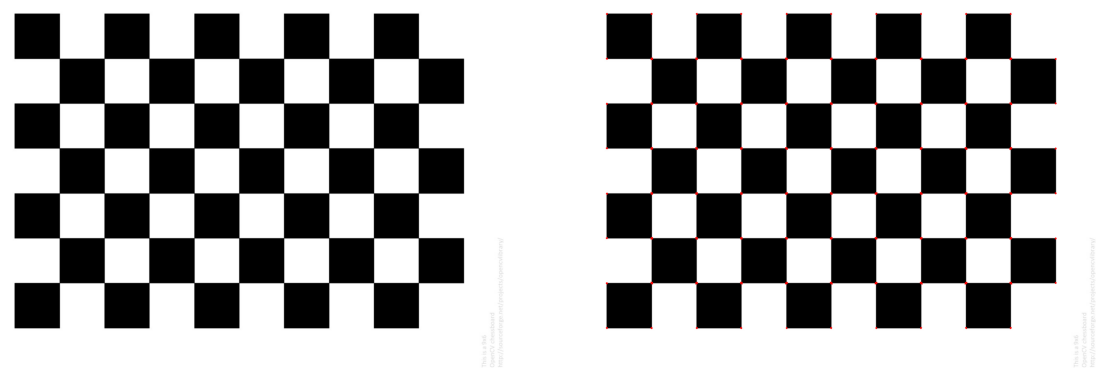

In [81]:
image = "test10.jpg"
orig = cv2.imread(image)

fig = plt.figure(figsize=(14, 14))
fig.add_subplot(1, 2, 1)
plt.axis('off')
plt.imshow(orig)

R = harris_c_detector(orig)
orig[R > 0.02*R.max()] = [255, 0, 0]

fig.add_subplot(1, 2, 2)
plt.axis('off')
plt.imshow(orig)

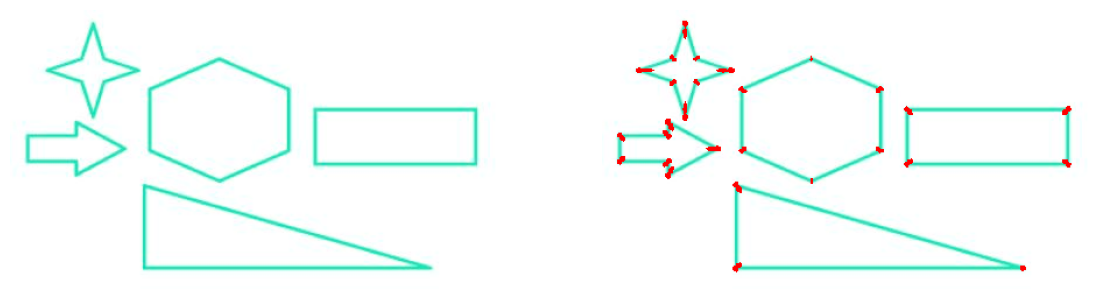

In [94]:
image = "test11.PNG"
orig = cv2.imread(image)

fig = plt.figure(figsize=(14, 14))
fig.add_subplot(1, 2, 1)
plt.axis('off')
plt.imshow(orig)

R = harris_c_detector(orig, window_size=5, k=0.04)
orig[R > 0.03*R.max()] = [255, 0, 0]

fig.add_subplot(1, 2, 2)
plt.axis('off')
plt.imshow(orig)

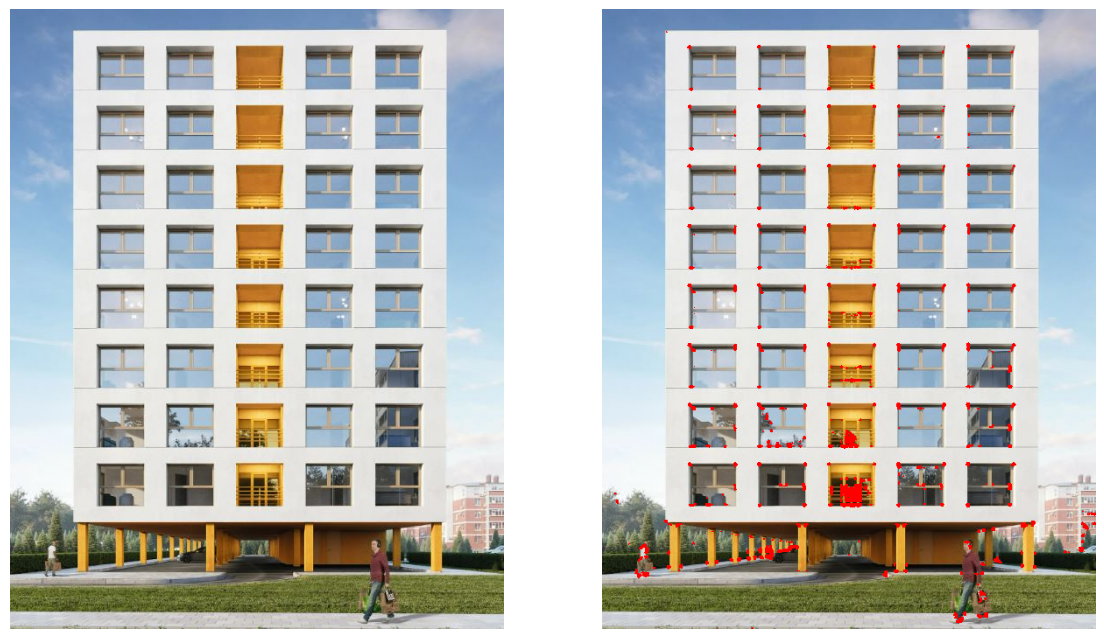

In [101]:
image = "test12.jpg"
orig = cv2.imread(image)
orig = cv2.cvtColor(orig, cv2.COLOR_RGB2BGR)

fig = plt.figure(figsize=(14, 14))
fig.add_subplot(1, 2, 1)
plt.axis('off')
plt.imshow(orig)

R = harris_c_detector(orig, window_size=5, k=0.04)
orig[R > 0.03*R.max()] = [255, 0, 0]

fig.add_subplot(1, 2, 2)
plt.axis('off')
plt.imshow(orig)